#  Projeto - Will it rain tomorrow?

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extraindo dados

###  Dados de chuva

In [74]:
rain = pd.read_csv('data_rain/rain_data_aus.csv')
rain = rain.drop('modelo_vigente', axis=1)

In [75]:
rain.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,...,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,...,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,...,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,...,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,...,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,...,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546


In [60]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

In [69]:
print(rain['date'].min())
print(rain['date'].max())

2007-11-01
2017-06-25


###  Dados de vento

In [52]:
wind = pd.read_csv('data_rain/wind_table_01.csv')
wind.head()

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0


In [53]:
for i in range(2,9):
    wind = pd.concat([wind, pd.read_csv(f'data_rain/wind_table_0{i}.csv')], ignore_index=True)
    
wind.head()

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164386 entries, 0 to 164385
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            164386 non-null  object 
 1   location        164386 non-null  object 
 2   wind_gustdir    36419 non-null   object 
 3   wind_gustspeed  36426 non-null   float64
 4   wind_dir9am     36932 non-null   object 
 5   wind_dir3pm     38990 non-null   object 
 6   wind_speed9am   39300 non-null   float64
 7   wind_speed3pm   39328 non-null   float64
 8   windgustdir     117389 non-null  object 
 9   windgustspeed   117442 non-null  float64
 10  winddir9am      116026 non-null  object 
 11  winddir3pm      120561 non-null  object 
 12  windspeed9am    123633 non-null  float64
 13  windspeed3pm    121475 non-null  float64
dtypes: float64(6), object(8)
memory usage: 17.6+ MB


In [57]:
cont = 2
for col in wind.columns[8:14]:
    wind.loc[~wind[col].isnull(), wind.columns[cont]] = wind.loc[~wind[col].isnull(), col]
    cont +=1
    
wind = wind.drop(['windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm', 'windspeed9am', 'windspeed3pm'], axis=1)

In [58]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164386 entries, 0 to 164385
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            164386 non-null  object 
 1   location        164386 non-null  object 
 2   wind_gustdir    153808 non-null  object 
 3   wind_gustspeed  153868 non-null  float64
 4   wind_dir9am     152958 non-null  object 
 5   wind_dir3pm     159551 non-null  object 
 6   wind_speed9am   162933 non-null  float64
 7   wind_speed3pm   160803 non-null  float64
dtypes: float64(3), object(5)
memory usage: 10.0+ MB


In [70]:
print(wind['date'].min())
print(wind['date'].max())

2007-11-01
2017-06-25


###  Agregando duas tabelas

In [76]:
df = pd.merge(left=rain, right=wind, how='left', on=['date', 'location'])

In [77]:
df.shape

(164386, 28)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164386 entries, 0 to 164385
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              164386 non-null  object 
 1   location          164386 non-null  object 
 2   mintemp           163614 non-null  float64
 3   maxtemp           163989 non-null  float64
 4   rainfall          162767 non-null  float64
 5   evaporation       90128 non-null   float64
 6   sunshine          80607 non-null   float64
 7   humidity9am       162352 non-null  float64
 8   humidity3pm       159262 non-null  float64
 9   pressure9am       148085 non-null  float64
 10  pressure3pm       148113 non-null  float64
 11  cloud9am          100879 non-null  float64
 12  cloud3pm          95716 non-null   float64
 13  temp9am           163410 non-null  float64
 14  temp3pm           160309 non-null  float64
 15  raintoday         162767 non-null  object 
 16  amountOfRain      16

##  Tratamento dos dados

In [87]:
df['date'] = pd.to_datetime(df['date'])

In [90]:
df[['raintoday', 'raintomorrow']].value_counts()

raintoday  raintomorrow
No         No              106828
Yes        No               19673
No         Yes              19372
Yes        Yes              16894
dtype: int64

In [99]:
df['raintomorrow'] = df['raintomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

In [100]:
df['raintomorrow'].value_counts()

0    127338
1     37048
Name: raintomorrow, dtype: int64

In [135]:
# Atenção: aqui, os dados nulos foram preenchidos com 0 (Negação)
df['raintoday'] = df['raintoday'].apply(lambda x: 1 if x == 'Yes' else 0)

In [136]:
df['raintoday'].value_counts()

0    127819
1     36567
Name: raintoday, dtype: int64

In [148]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['wind_gustdir'])


df['wind_gustdir'] = encoder.transform(df['wind_gustdir'])
df['wind_dir9am'] = encoder.transform(df['wind_dir9am'])
df['wind_dir3pm'] = encoder.transform(df['wind_dir3pm'])

In [150]:
df[['mintemp', 'maxtemp', 'temp', 'temp9am', 'temp3pm']]

,mintemp,maxtemp,temp,temp9am,temp3pm
0,13.4,22.9,29.48,16.9,21.8
1,7.4,25.1,32.12,17.2,24.3
2,12.9,25.7,32.84,21.0,23.2
3,9.2,28.0,35.60,18.1,26.5
4,17.5,32.3,40.76,17.8,29.7
...,...,...,...,...,...
164381,3.6,25.3,32.36,10.9,24.5
164382,5.4,26.9,34.28,12.5,26.1
164383,5.4,26.9,34.28,12.5,26.1
164384,7.8,27.0,34.40,15.1,26.0


In [152]:
df[['mintemp', 'maxtemp', 'temp', 'temp9am', 'temp3pm', 'raintomorrow']].corr()

,mintemp,maxtemp,temp,temp9am,temp3pm,raintomorrow
mintemp,1.000000,0.736835,0.585375,0.902404,0.708974,0.082160
maxtemp,0.736835,1.000000,0.795143,0.887397,0.984536,-0.159619
temp,0.585375,0.795143,1.000000,0.704422,0.782308,-0.125842
temp9am,0.902404,0.887397,0.704422,1.000000,0.860599,-0.026293
temp3pm,0.708974,0.984536,0.782308,0.860599,1.000000,-0.193129
raintomorrow,0.082160,-0.159619,-0.125842,-0.026293,-0.193129,1.000000


In [159]:
df[['humidity9am', 'humidity3pm', 'humidity']].corr()

,humidity9am,humidity3pm,humidity
humidity9am,1.000000,0.666595,0.605826
humidity3pm,0.666595,1.000000,0.908273
humidity,0.605826,0.908273,1.000000


C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\issao\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

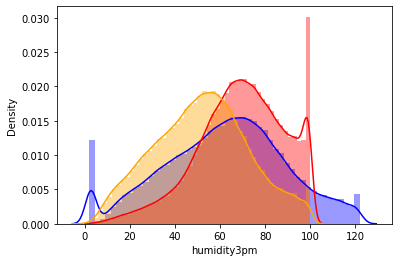

In [160]:
sns.distplot(df['humidity'], color='blue')
sns.distplot(df['humidity9am'], color='red')
sns.distplot(df['humidity3pm'], color='orange');

In [162]:
len(df['location'].value_counts())

49

<AxesSubplot:xlabel='raintomorrow', ylabel='amountOfRain'>

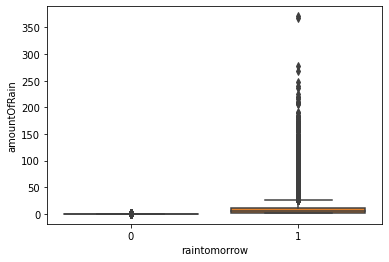

In [196]:
sns.boxplot(x=df['raintomorrow'], y=df['amountOfRain'])

In [210]:
df[['amountOfRain', 'raintomorrow']].groupby('raintomorrow').agg(['min', 'max'])

amountOfRain       
                      min    max
raintomorrow                    
0                     0.0    1.0
1                     1.1  371.0

In [211]:
df[['amountOfRain', 'raintoday']].groupby('raintoday').agg(['min', 'max'])

amountOfRain       
                   min    max
raintoday                    
0                  0.0  240.0
1                  0.0  371.0

In [88]:
df['location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am',
   'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'amountOfRain', 'temp', 'humidity', 'precipitation3pm',
   'precipitation9am', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am',
       'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'],
      dtype='object')

##  Separando treino e teste

In [200]:
X = df[['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am',
       'pressure3pm', 'cloud9am', 'cloud3pm', 'raintoday', 'precipitation3pm', 'precipitation9am',
       'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm']]
y = df['raintomorrow']

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35, stratify=y)

In [202]:
X_train.shape

(131508, 20)

##  Standard

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

##  Treinando modelo LGBM

In [203]:
from lightgbm import LGBMClassifier, plot_importance

lgbm = LGBMClassifier(max_depth=2, n_estimators=50, colsample_bytree=.3, n_jobs=-1)
lgbm.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.3, max_depth=2, n_estimators=50)

In [204]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

print(roc_auc_score(y_train, lgbm.predict_proba(X_train)[:,1]))
print(roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1]))

0.8504460763491916
0.8523360505109532


In [205]:
lgbm.predict_proba(X_test)[:,1]

array([0.25416673, 0.2152516 , 0.10825203, ..., 0.15417323, 0.20923534,
       0.04531317])

In [206]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(lgbm.predict(X_test), y_test))
print(recall_score(lgbm.predict(X_test), y_test))
print(f1_score(lgbm.predict(X_test), y_test))

0.37206477732793525
0.7522510231923601
0.4978781038374719


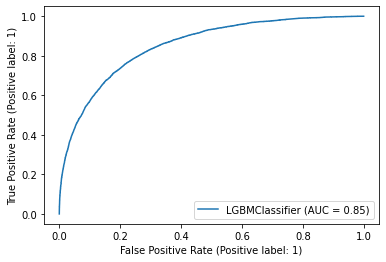

In [207]:
plot_roc_curve(lgbm, X_test, y_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

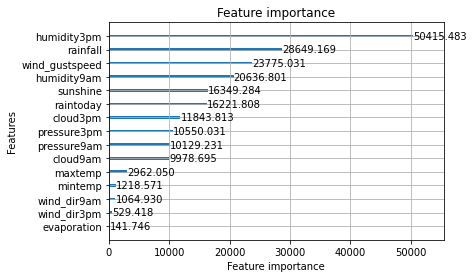

In [208]:
plot_importance(lgbm, importance_type='gain')